In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
from sklearn.metrics import mean_absolute_percentage_error

In [378]:
df = pd.read_excel(r'C:\Users\Lenovo\Desktop\Quation\Final project\SKU3_withexog.xlsx')

In [379]:
df.set_index('Date', inplace=True)

In [380]:
df.head()

,Sales,EXG INC,EXG DEC
Date,,,
2021-04-01,1914,1,0
2021-05-01,306,0,1
2021-06-01,2197,1,0
2021-07-01,2033,0,0
2021-08-01,3438,1,0


In [381]:
qty_values = df['Sales']
result = adfuller(qty_values)
# Extract and print the test results
print('Dickey-Fuller Test Results:')
print('Test Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Dickey-Fuller Test Results:
Test Statistic: -4.461385098136179
p-value: 0.00023076533437641454
Critical Values:
	1%: -3.6699197407407405
	5%: -2.9640707407407407
	10%: -2.621171111111111


Data is stationary

<Figure size 1200x600 with 0 Axes>

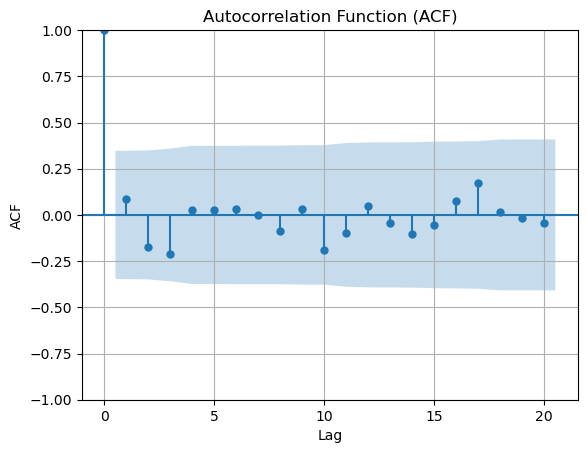

<Figure size 1200x600 with 0 Axes>

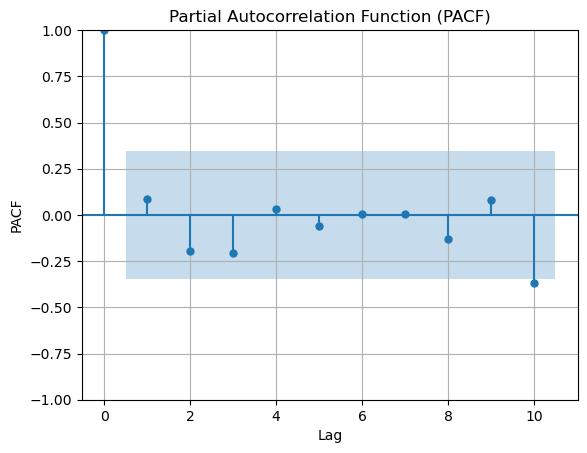

In [382]:
# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(df["Sales"],lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df["Sales"],lags=10)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)
plt.show()

In [383]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
df_train = pd.DataFrame()
df_test = pd.DataFrame()
df_train['Sales'] = None
df_test['Sales'] = None
df_t=df['Sales']
df_train['Sales']=df.iloc[:28]['Sales']
df_test['Sales']=df.iloc[28:]['Sales']
exog_train = df.iloc[:28][['EXG INC','EXG DEC']]
exog_test=df.iloc[28:][['EXG INC','EXG DEC']]
exog_test

,EXG INC,EXG DEC
Date,,
2023-08-01,1,0
2023-09-01,1,0
2023-10-01,0,1
2023-11-01,0,1


In [384]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Assuming df_train and exog_train are already defined
# For example:
# df_train = pd.DataFrame({'shift1': ...})
# exog_train = pd.DataFrame({'exog_var': ...})

# Function to find the best ARIMA model
def find_best_arima_model(y, exog, p_values, q_values, d=0):
    best_aic = np.inf
    best_order = None
    best_model = None

    for p in p_values:
        for q in q_values:
            try:
                model = ARIMA(y, exog=exog, order=(p, d, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, d, q)
                    best_model = results
                print(f'ARIMA({p},{d},{q}) - AIC:{results.aic}')
            except Exception as e:
                print(f'ARIMA({p},{d},{q}) - Failed with error: {e}')
                continue

    return best_order, best_model

# Define the range for p and q
p_values = range(1, 6)
q_values = range(1, 6)

# Find the best ARIMA model
best_order, best_model = find_best_arima_model(df_train['Sales'], exog_train, p_values, q_values)

# Print the best model summary
if best_model is not None:
    print(f'Best ARIMA order: {best_order}')
    print(best_model.summary())
else:
    print('No suitable ARIMA model found.')


ARIMA(1,0,1) - AIC:410.76976707136237
ARIMA(1,0,2) - AIC:403.4100883135916
ARIMA(1,0,3) - AIC:406.0185227491657
ARIMA(1,0,4) - AIC:403.6224292540752
ARIMA(1,0,5) - AIC:403.6808475034658
ARIMA(2,0,1) - AIC:409.77884648354336
ARIMA(2,0,2) - AIC:401.2688559964289
ARIMA(2,0,3) - AIC:403.20685553702106
ARIMA(2,0,4) - AIC:408.1772295060409
ARIMA(2,0,5) - AIC:406.699411796684
ARIMA(3,0,1) - AIC:412.0863573610968
ARIMA(3,0,2) - AIC:403.1732180634999
ARIMA(3,0,3) - AIC:408.7314639195287
ARIMA(3,0,4) - AIC:407.13926823457314
ARIMA(3,0,5) - AIC:409.32120108775524
ARIMA(4,0,1) - AIC:413.51328302081305
ARIMA(4,0,2) - AIC:407.76963829760234
ARIMA(4,0,3) - AIC:408.3687048256508
ARIMA(4,0,4) - AIC:407.32836711986545
ARIMA(4,0,5) - AIC:409.1827659488025
ARIMA(5,0,1) - AIC:413.24516108427133
ARIMA(5,0,2) - AIC:411.456900769437
ARIMA(5,0,3) - AIC:411.0466026155908
ARIMA(5,0,4) - AIC:408.5751590134924
ARIMA(5,0,5) - AIC:416.52195713859436
Best ARIMA order: (2, 0, 2)
                               SARIMAX 

In [385]:
model = ARIMA(df_train["Sales"],exog=exog_train, order=(2, 0, 2))
results = model.fit()
print(results.summary())
# Forecast future values for the test data
forecast = results.forecast(steps=len(df_test), exog=exog_test)
forecast = forecast.astype(int)
print(df_test)

df_forecast=forecast
#df_forecast.loc[59]=0
df_forecast

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   28
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -192.634
Date:                Mon, 17 Jun 2024   AIC                            401.269
Time:                        13:20:52   BIC                            411.926
Sample:                    04-01-2021   HQIC                           404.527
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1836.8267    141.881     12.946      0.000    1558.746    2114.907
EXG INC      711.5311    100.720      7.064      0.000     514.124     908.938
EXG DEC     -585.2499     67.667     -8.649      0.0

2023-08-01    2805
2023-09-01    2737
2023-10-01    1224
2023-11-01    1133
Freq: MS, Name: predicted_mean, dtype: int32

Mean Absolute Percentage Error (MAPE): 16.63%


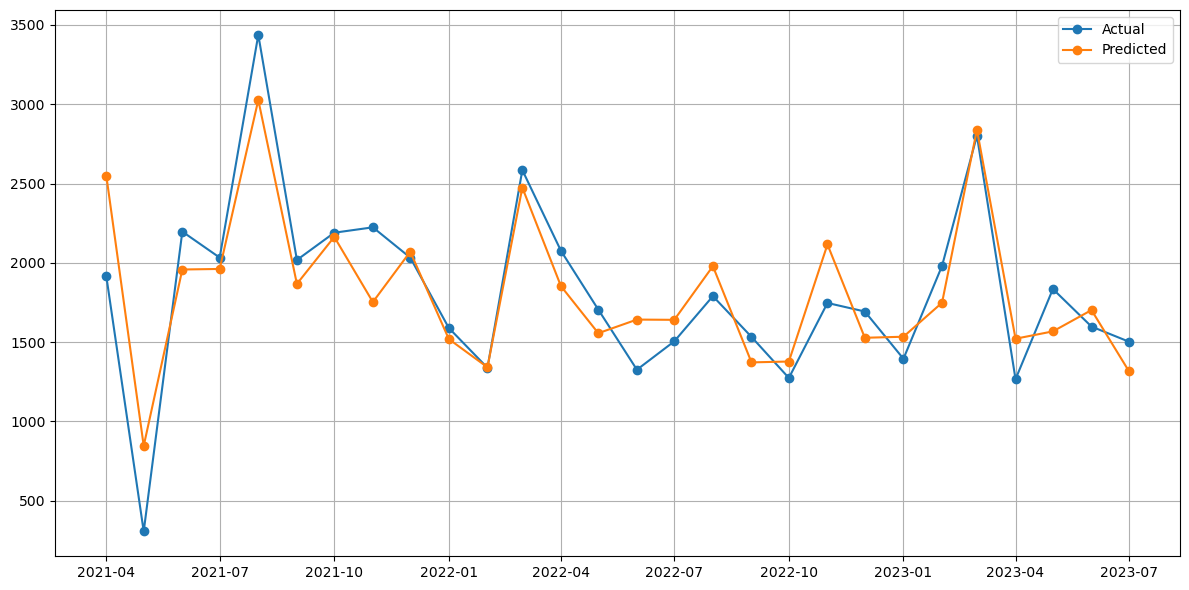

In [386]:
mape = mean_absolute_percentage_error(df_train['Sales'],results.fittedvalues ) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
plt.figure(figsize=(12,6))
plt.plot(df_train['Sales'],label='Actual',marker='o')
plt.plot(results.fittedvalues,label='Predicted',marker='o')
plt.legend()
plt.grid(True)  # Enable grid lines
plt.tight_layout()

Mean Absolute Percentage Error (MAPE): 13.37%


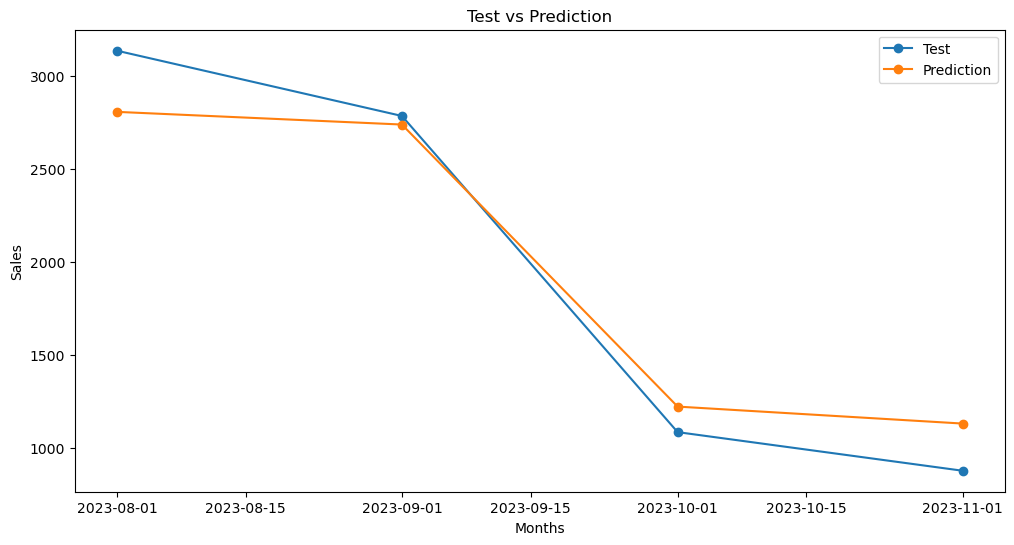

In [387]:
from sklearn.metrics import mean_absolute_percentage_error
# mape = np.mean(np.abs((forecast - df_test['QTY']) / df_test['QTY'])) * 100
# print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
mape = mean_absolute_percentage_error(df_test['Sales'], df_forecast) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Visualize the forecast
plt.figure(figsize=(12,6))
plt.plot(df_test['Sales'], label='Test',marker='o')
plt.plot(forecast, label='Prediction',marker='o')
plt.legend()
plt.title('Test vs Prediction')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()


In [430]:
df_predict = pd.read_excel(r'C:\Users\Lenovo\Desktop\Quation\Final project\SKU3_withexog.xlsx', sheet_name='Sheet2')

In [431]:
df_predict.set_index('Date', inplace=True)
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2023-12-01 to 2024-03-01
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   EXG INC  4 non-null      int64
 1   EXG DEC  4 non-null      int64
dtypes: int64(2)
memory usage: 96.0 bytes


In [432]:
# Extract the relevant exogenous variables
exog_f = df_predict[['EXG INC','EXG DEC']]

In [433]:
# Forecast future values using the results model and exogenous variables
pred = results.forecast(steps=len(df_predict), exog=exog_f)
# Convert predictions to integer
pred = list(pred.astype(int))
# Add the forecasted values to the 'Sales' column of df_predict
df_predict['Sales'] = pred

In [436]:
print(df_predict['Sales'])
df_final=pd.concat([df, df_predict], axis=0)

Date
2023-12-01    1508
2024-01-01    1441
2024-02-01    1809
2024-03-01    2430
Name: Sales, dtype: int64


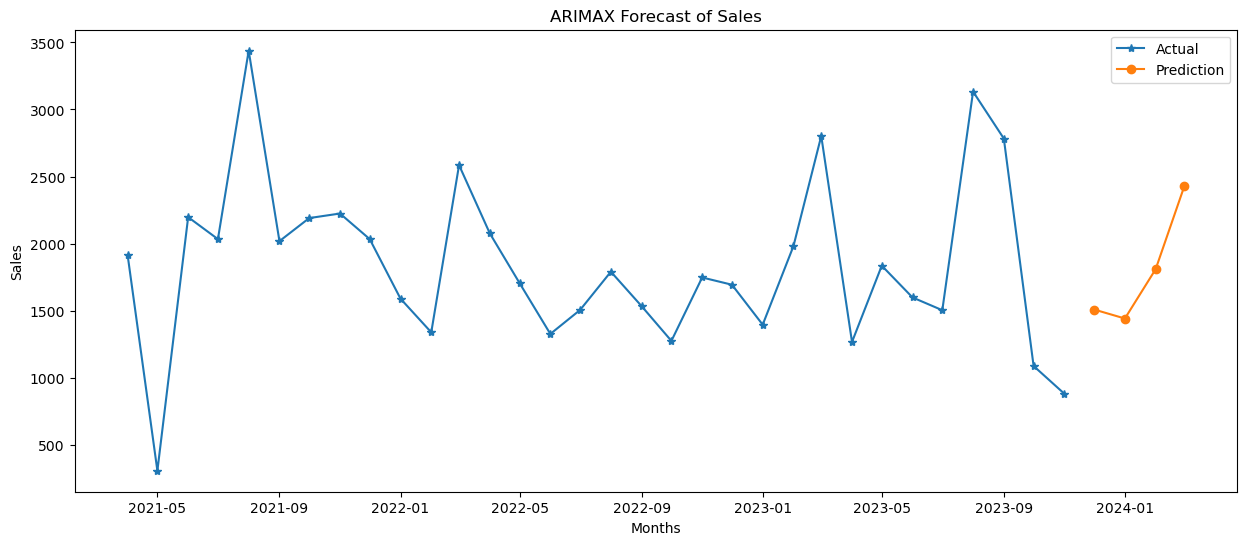

In [435]:
a=32
df_a=df_final.iloc[:a]
df_p=df_final.iloc[a:]
# Visualize the forecast
plt.figure(figsize=(15,6))
plt.plot( df_a['Sales'], label='Actual', marker='*')
plt.plot( df_p['Sales'], label='Prediction', marker='o')
# plt.plot(df_final.index, pred, label='Prediction')
plt.legend()
plt.title('ARIMAX Forecast of Sales')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()